# Tech Challenge - Fase 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import joblib

## Import dos Dados

In [2]:
df = pd.read_csv('bases/Obesity.csv', sep=',')
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

## Ajuste Tipo dos Dados

### Valores Inteiros das Colunas Float

In [4]:
cols = ["Age", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
df[cols] = df[cols].astype(int)

df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


### Arredondamento 2 Casas Decimais

In [5]:
df[["Height", "Weight"]] = df[["Height", "Weight"]].round(2)

df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   int64  
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   int64  
 7   NCP             2111 non-null   int64  
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   int64  
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   int64  
 13  TUE             2111 non-null   int64  
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(2), int64(6), object(9

## Dicionário dos Dados

In [7]:
colunas = ['Gender', 'family_history', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'Obesity']

for coluna in colunas:
    print(f"\nValores únicos da coluna {coluna}:")
    print(df[coluna].unique())


Valores únicos da coluna Gender:
['Female' 'Male']

Valores únicos da coluna family_history:
['yes' 'no']

Valores únicos da coluna FAVC:
['no' 'yes']

Valores únicos da coluna FCVC:
[2 3 1]

Valores únicos da coluna NCP:
[3 1 4 2]

Valores únicos da coluna CAEC:
['Sometimes' 'Frequently' 'Always' 'no']

Valores únicos da coluna SMOKE:
['no' 'yes']

Valores únicos da coluna CH2O:
[2 3 1]

Valores únicos da coluna SCC:
['no' 'yes']

Valores únicos da coluna FAF:
[0 3 2 1]

Valores únicos da coluna TUE:
[1 0 2]

Valores únicos da coluna CALC:
['no' 'Sometimes' 'Frequently' 'Always']

Valores únicos da coluna MTRANS:
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']

Valores únicos da coluna Obesity:
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [8]:
map_gender = {
    'Female': 'Feminino',
    'Male': 'Masculino'
}

map_yes_no = {
    'yes': 'Sim',
    'no': 'Não'
}

map_FCVC = {
    1: 'Raramente',
    2: 'Às vezes',
    3: 'Sempre'
}

map_NCP = {
    1: 'Uma Refeição',
    2: 'Duas Refeições',
    3: 'Três Refeições',
    4: 'Quatro ou Mais Refeições'
}

map_CAEC = {
    'no': 'Nunca',
    'Sometimes': 'Às vezes',
    'Frequently': 'Frequentemente',
    'Always': 'Sempre'
}

map_CH2O = {
    1: '< 1 L/dia',
    2: '1–2 L/dia',
    3: '> 2 L/dia',
}

map_FAF = {
    0: 'Nunca',
    1: '~1–2×/sem',
    2: '~3–4×/sem',
    3: '5×/sem ou mais'
}

map_TUE = {
    0: '~0–2 h/dia',
    1: '~3–5 h/dia',
    2: '> 5 h/dia',
}

map_CALC = {
    'no': 'Nunca',
    'Sometimes': 'Às vezes',
    'Frequently': 'Frequentemente',
    'Always': 'Sempre'
}

map_MTRANS = {
    'Automobile': 'Carro',
    'Motorbike': 'Moto',
    'Bike': 'Bicicleta',
    'Public_Transportation': 'Transporte Público',
    'Walking': 'A pé'
}

map_obesity = {
    'Insufficient_Weight': 'Abaixo do peso',
    'Normal_Weight': 'Peso normal',
    'Overweight_Level_I': 'Sobrepeso I',
    'Overweight_Level_II': 'Sobrepeso II',
    'Obesity_Type_I': 'Obesidade I',
    'Obesity_Type_II': 'Obesidade II',
    'Obesity_Type_III': 'Obesidade III'
}

df['Gender'] = df['Gender'].map(map_gender)
df['family_history'] = df['family_history'].map(map_yes_no)
df['FAVC'] = df['FAVC'].map(map_yes_no)
df['SMOKE'] = df['SMOKE'].map(map_yes_no)
df['SCC'] = df['SCC'].map(map_yes_no)
df['FCVC'] = df['FCVC'].map(map_FCVC)
df['NCP'] = df['NCP'].map(map_NCP)
df['CAEC'] = df['CAEC'].map(map_CAEC)
df['CH2O'] = df['CH2O'].map(map_CH2O)
df['FAF'] = df['FAF'].map(map_FAF)
df['TUE'] = df['TUE'].map(map_TUE)
df['CALC'] = df['CALC'].map(map_CALC)
df['MTRANS'] = df['MTRANS'].map(map_MTRANS)
df['Obesity'] = df['Obesity'].map(map_obesity)

df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Feminino,21,1.62,64.0,Sim,Não,Às vezes,Três Refeições,Às vezes,Não,1–2 L/dia,Não,Nunca,~3–5 h/dia,Nunca,Transporte Público,Peso normal
1,Feminino,21,1.52,56.0,Sim,Não,Sempre,Três Refeições,Às vezes,Sim,> 2 L/dia,Sim,5×/sem ou mais,~0–2 h/dia,Às vezes,Transporte Público,Peso normal
2,Masculino,23,1.80,77.0,Sim,Não,Às vezes,Três Refeições,Às vezes,Não,1–2 L/dia,Não,~3–4×/sem,~3–5 h/dia,Frequentemente,Transporte Público,Peso normal
3,Masculino,27,1.80,87.0,Não,Não,Sempre,Três Refeições,Às vezes,Não,1–2 L/dia,Não,~3–4×/sem,~0–2 h/dia,Frequentemente,A pé,Sobrepeso I
4,Masculino,22,1.78,89.8,Não,Não,Às vezes,Uma Refeição,Às vezes,Não,1–2 L/dia,Não,Nunca,~0–2 h/dia,Às vezes,Transporte Público,Sobrepeso II


## Análise Exploratória

### Variáveis Quantitativas

In [9]:
colunas_quantitativas = ['Age', 'Height', 'Weight']
df[colunas_quantitativas].describe()

,Age,Height,Weight
count,2111.000000,2111.000000,2111.000000
mean,23.972525,1.701620,86.586035
std,6.308664,0.093368,26.191163
min,14.000000,1.450000,39.000000
25%,19.000000,1.630000,65.470000
50%,22.000000,1.700000,83.000000
75%,26.000000,1.770000,107.430000
max,61.000000,1.980000,173.000000


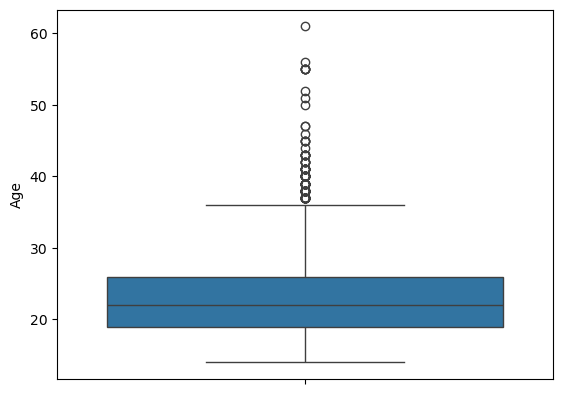

In [10]:
sns.boxplot(data=df, y='Age')
plt.xticks(rotation=45)
plt.show()

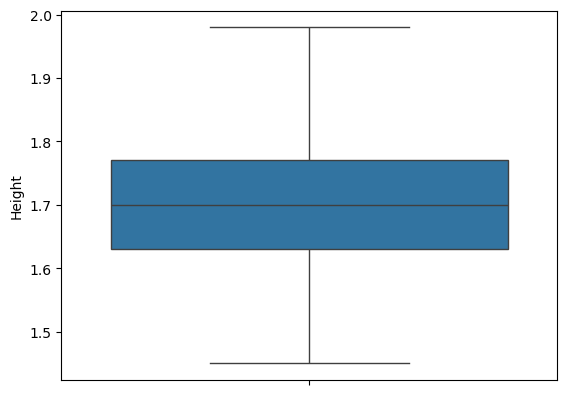

In [11]:
sns.boxplot(data=df, y='Height')
plt.xticks(rotation=45)
plt.show()

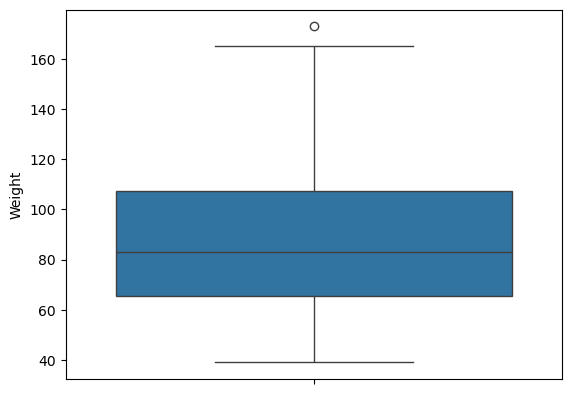

In [12]:
sns.boxplot(data=df, y='Weight')
plt.xticks(rotation=45)
plt.show()

### Variáveis Qualitativas

In [13]:
colunas_qualitativas = ['Gender', 'family_history', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'Obesity']

for coluna in colunas_qualitativas:
    print(f"\n\nDistribuição percentual da coluna: {coluna}\n")
    print(df[coluna].value_counts(normalize=True) * 100)



Distribuição percentual da coluna: Gender

Gender
Masculino    50.592136
Feminino     49.407864
Name: proportion, dtype: float64


Distribuição percentual da coluna: family_history

family_history
Sim    81.762198
Não    18.237802
Name: proportion, dtype: float64


Distribuição percentual da coluna: FAVC

FAVC
Sim    88.394126
Não    11.605874
Name: proportion, dtype: float64


Distribuição percentual da coluna: FCVC

FCVC
Às vezes     59.545239
Sempre       30.885836
Raramente     9.568925
Name: proportion, dtype: float64


Distribuição percentual da coluna: NCP

NCP
Três Refeições              64.519185
Uma Refeição                18.711511
Duas Refeições              13.500711
Quatro ou Mais Refeições     3.268593
Name: proportion, dtype: float64


Distribuição percentual da coluna: CAEC

CAEC
Às vezes          83.609664
Frequentemente    11.463761
Sempre             2.510658
Nunca              2.415917
Name: proportion, dtype: float64


Distribuição percentual da coluna: SMOKE

S

### Correlação

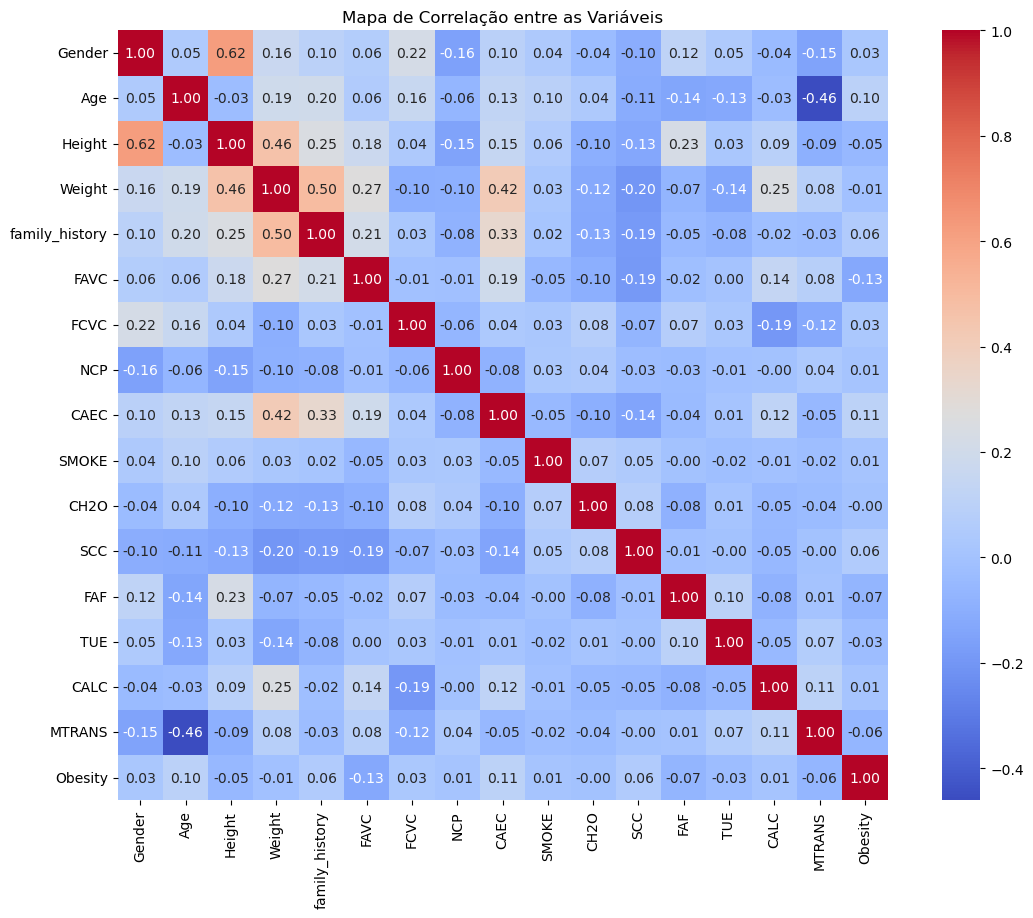

In [14]:
df_corr = df.copy()

# Label Encoding nas colunas qualitativas
le = LabelEncoder()
for col in colunas_qualitativas:
    df_corr[col] = le.fit_transform(df_corr[col])

# Correlação
correlation_matrix = df_corr.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Mapa de Correlação entre as Variáveis")
plt.show()

## Criação da Variável Target

In [ ]:
conditions = [
    df['Obesity'].isin(['Abaixo do peso']),             # Abaixo do peso
    df['Obesity'].isin(['Peso normal']),             # Peso normal
    df['Obesity'].isin(['Sobrepeso I', 'Sobrepeso II']),             # Sobrepeso
    df['Obesity'].isin(['Obesidade I', 'Obesidade II', 'Obesidade III'])  # Obeso
]

values = ['Abaixo do peso', 'Peso normal', 'Sobrepeso', 'Obeso']

df['Obesity_Class'] = np.select(conditions, values, default='Outro')

In [16]:
df['Obesity_Class'].value_counts(normalize=True) * 100

Obesity_Class
Obeso             46.044529
Sobrepeso         27.475130
Peso normal       13.595452
Abaixo do peso    12.884889
Name: proportion, dtype: float64

In [17]:
df.to_csv('bases/Obesity_tratado.csv', index=False)

## Pipeline

### Remover Colunas

In [18]:
class DropFeatures(BaseEstimator, TransformerMixin):
  # def __init__(self, feature_to_drop=['Obesity', 'Height', 'Weight']]):
  def __init__(self, feature_to_drop=['Obesity', 'Weight']):
    self.feature_to_drop = feature_to_drop

  def fit(self, df):
    return self

  def transform(self, df):
    if (set(self.feature_to_drop).issubset(df.columns)):
      df.drop(self.feature_to_drop, axis=1, inplace=True)
      return df
    else:
      print('Uma ou mais features não estão no DataFrame 1')
      return df

### Normalizar Colunas

In [19]:
class MinMax(BaseEstimator, TransformerMixin):
    # def __init__(self, min_max_scaler=['Age', 'Height', 'Weight']):
    def __init__(self, min_max_scaler=['Age', 'Height']):
        self.min_max_scaler = min_max_scaler
        self.scaler = MinMaxScaler()

    def fit(self, df):
        if set(self.min_max_scaler).issubset(df.columns):
            self.scaler.fit(df[self.min_max_scaler])
        else:
            print("Uma ou mais features não estão no DataFrame 2")
        return self

    def transform(self, df):
        if set(self.min_max_scaler).issubset(df.columns):
            df[self.min_max_scaler] = self.scaler.transform(df[self.min_max_scaler])
            return df
        else:
            print("Uma ou mais features não estão no DataFrame 2")
            return df

### Codificar Variáveis Categóricas Nominais

In [20]:
class OneHotEncodingNames(BaseEstimator, TransformerMixin):
    def __init__(self, OneHotEncoding=['Gender', 'family_history', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']):
        self.OneHotEncoding = OneHotEncoding
        self.encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    def fit(self, df, y=None):
        # Fit apenas nas colunas categóricas
        self.encoder.fit(df[self.OneHotEncoding])
        return self

    def transform(self, df):
        if not set(self.OneHotEncoding).issubset(df.columns):
            print('Uma ou mais features não estão no DataFrame 3')
            return df

        # Transform sem refazer fit
        onehot_array = self.encoder.transform(df[self.OneHotEncoding])
        feature_names = self.encoder.get_feature_names_out(self.OneHotEncoding)

        df_onehot = pd.DataFrame(onehot_array, columns=feature_names, index=df.index)

        # Mantém colunas que não foram one-hot
        outras_features = df.drop(columns=self.OneHotEncoding)

        # Concatena
        df_final = pd.concat([df_onehot, outras_features], axis=1)

        return df_final

### Codificar Variáveis Ordinais

In [21]:
class OrdinalFeature(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Definindo explicitamente a ordem das categorias
        self.ordinal_feature = ['FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'CALC']

        self.categories = [
            ['Raramente', 'Às vezes', 'Sempre'],  # FCVC
            ['Uma Refeição', 'Duas Refeições', 'Três Refeições', 'Quatro ou Mais Refeições'],  # NCP
            ['Nunca', 'Às vezes', 'Frequentemente', 'Sempre'],  # CAEC
            ['< 1 L/dia', '1–2 L/dia', '> 2 L/dia'],  # CH2O
            ['Nunca', '~1–2×/sem', '~3–4×/sem', '5×/sem ou mais'],  # FAF
            ['~0–2 h/dia', '~3–5 h/dia', '> 5 h/dia'],  # TUE
            ['Nunca', 'Às vezes', 'Frequentemente', 'Sempre']  # CALC
        ]

        self.encoder = OrdinalEncoder(categories=self.categories)

    def fit(self, df):
        if set(self.ordinal_feature).issubset(df.columns):
            self.encoder.fit(df[self.ordinal_feature])
        else:
            print("Uma ou mais features não estão no DataFrame 4")
        return self

    def transform(self, df):
        if set(self.ordinal_feature).issubset(df.columns):
            df[self.ordinal_feature] = self.encoder.transform(df[self.ordinal_feature])
            return df
        else:
            print("Uma ou mais features não estão no DataFrame 4")
            return df

### Ajustar Amostras

In [22]:
class Oversample(BaseEstimator, TransformerMixin):
    def __init__(self, target='Obesity_Class'):
        self.target = target
        self.smote = SMOTE(sampling_strategy='minority')

    def fit(self, df, y=None):
        # Fit não deve aplicar SMOTE, apenas retornar self
        self.apply_smote = True
        return self

    def transform(self, df):

        if self.target not in df.columns:
            print(f"A coluna alvo '{self.target}' não está no DataFrame.")
            return df
        
        # Somente aplica SMOTE quando apply_smote=True
        if not self.apply_smote:
            return df

        X = df.drop(columns=[self.target])
        y = df[self.target]

        X_res, y_res = self.smote.fit_resample(X, y)

        df_res = pd.DataFrame(X_res, columns=X.columns)
        df_res[self.target] = y_res

        # Depois do fit(), ao chamar transform() no teste, desativa SMOTE
        self.apply_smote = False

        return df_res

## Função Pipeline

- Separa treino e teste e aplica a pipeline

In [23]:
def preparar_dados(df, target='Obesity_Class'):

    # Separa X e y
    X = df.drop(columns=[target])
    y = df[target]

    # Split dos dados com estratificação
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    # Junta para aplicar passos da pipeline
    df_train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
    df_test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

    print(df_train.shape)
    print(df_test.shape)
    

    # Pipeline Completa
    pipe = Pipeline([
        ('drop_old_target', DropFeatures()),  # ✅ remove a coluna antiga "Obesity"
        ('OneHotEncoding', OneHotEncodingNames()),
        ('ordinal_feature', OrdinalFeature()),
        ('min_max_scaler', MinMax()),
        ('oversample', Oversample(target=target))  # ✅ SMOTE apenas no treino
    ])

    # Fit + transform apenas no treino
    df_train_transformed = pipe.fit_transform(df_train)

    # Transform apenas no teste — SEM SMOTE
    df_test_transformed = pipe.transform(df_test)

    # Separa X e y novamente
    X_train_final = df_train_transformed.drop(columns=[target])
    y_train_final = df_train_transformed[target]

    X_test_final = df_test_transformed.drop(columns=[target])
    y_test_final = df_test_transformed[target]

    return X_train_final, X_test_final, y_train_final, y_test_final, pipe


In [24]:
X_treino, X_teste, y_treino, y_teste, pipeline = preparar_dados(df)

print(X_treino.shape)
print(X_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

print()
print(y_treino.value_counts(normalize=True) * 100)
print()
print(y_teste.value_counts(normalize=True) * 100)

(1688, 18)
(423, 18)
(2247, 24)
(423, 24)
(2247,)
(423,)

Obesity_Class
Obeso             34.579439
Abaixo do peso    34.579439
Sobrepeso         20.649755
Peso normal       10.191366
Name: proportion, dtype: float64

Obesity_Class
Obeso             46.099291
Sobrepeso         27.423168
Peso normal       13.711584
Abaixo do peso    12.765957
Name: proportion, dtype: float64


## Modelos

In [25]:
def roda_modelo(modelo):

  modelo.fit(X_treino, y_treino)
  prob_predic = modelo.predict_proba(X_teste)

  print(f"\n------------------------------Resultados {modelo}------------------------------\n")

  # Calculate AUC for multiclass
  auc = roc_auc_score(y_teste, prob_predic, multi_class='ovr')
  print(f"AUC: {auc}")


  print("\nConfusion Matrix\n")

  # Criando matriz de confusão
  fix, ax = plt.subplots(figsize=(5,5))
  matriz_confusao = ConfusionMatrixDisplay.from_estimator(modelo, X_teste, y_teste, normalize='true',
                                                          ax=ax, cmap=plt.cm.Blues, values_format=".2f")

  ax.set_title("Matriz de Confusão\n Normalizada", fontsize=16, fontweight="bold")
  ax.set_xlabel("Label predita", fontsize=18)
  ax.set_ylabel("Label verdadeira", fontsize=18)
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  plt.show(matriz_confusao)


  # Fazendo a predição dos dados de teste e calculando o classification report
  predicao = modelo.predict(X_teste)

  print("\nClassification Report")
  print(classification_report(y_teste, predicao, zero_division=0))


### Regressão Logística

In [26]:
from sklearn.linear_model import LogisticRegression
modelo_logistico = LogisticRegression()


------------------------------Resultados LogisticRegression()------------------------------

AUC: 0.8307708801260496

Confusion Matrix



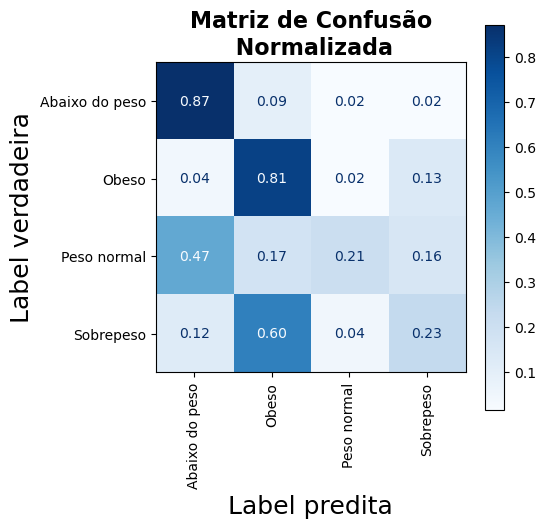


Classification Report
                precision    recall  f1-score   support

Abaixo do peso       0.49      0.87      0.63        54
         Obeso       0.65      0.81      0.72       195
   Peso normal       0.57      0.21      0.30        58
     Sobrepeso       0.43      0.23      0.30       116

      accuracy                           0.58       423
     macro avg       0.53      0.53      0.49       423
  weighted avg       0.56      0.58      0.54       423



In [27]:
roda_modelo(modelo_logistico)

### Árvore de Decisão

In [28]:
from sklearn.tree import DecisionTreeClassifier
modelo_tree = DecisionTreeClassifier()


------------------------------Resultados DecisionTreeClassifier()------------------------------

AUC: 0.869836354718468

Confusion Matrix



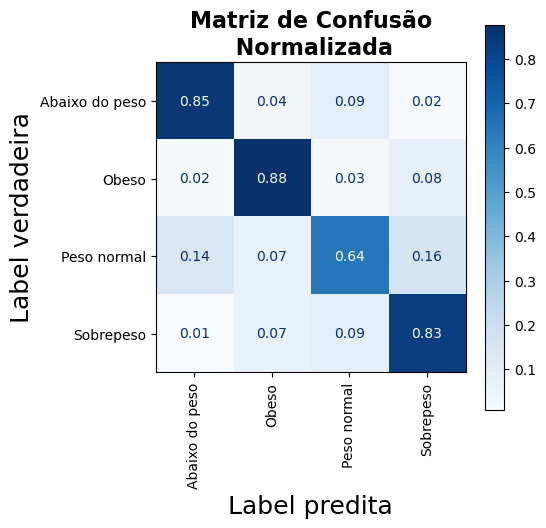


Classification Report
                precision    recall  f1-score   support

Abaixo do peso       0.78      0.85      0.81        54
         Obeso       0.92      0.88      0.90       195
   Peso normal       0.64      0.64      0.64        58
     Sobrepeso       0.79      0.83      0.81       116

      accuracy                           0.83       423
     macro avg       0.78      0.80      0.79       423
  weighted avg       0.83      0.83      0.83       423



In [29]:
roda_modelo(modelo_tree)

### Random Forest (Modelo Escolhido)

In [30]:
from sklearn.ensemble import RandomForestClassifier
modelo_forest = RandomForestClassifier()


------------------------------Resultados RandomForestClassifier()------------------------------

AUC: 0.967266669169668

Confusion Matrix



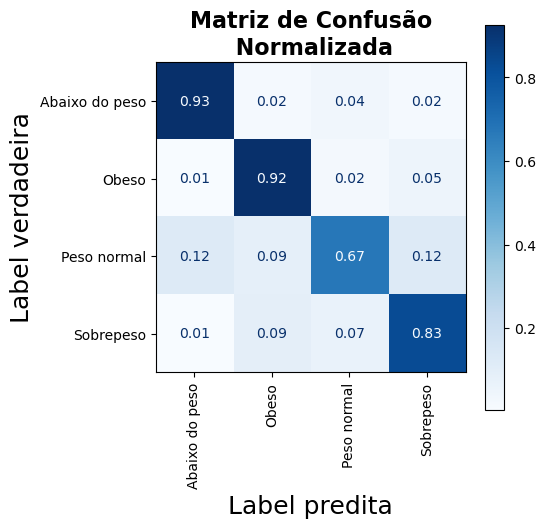


Classification Report
                precision    recall  f1-score   support

Abaixo do peso       0.85      0.93      0.88        54
         Obeso       0.91      0.92      0.92       195
   Peso normal       0.74      0.67      0.70        58
     Sobrepeso       0.84      0.83      0.83       116

      accuracy                           0.86       423
     macro avg       0.83      0.84      0.84       423
  weighted avg       0.86      0.86      0.86       423



In [31]:
roda_modelo(modelo_forest)

In [33]:
joblib.dump(modelo_forest, 'modelo_forest.joblib')

['modelo_forest.joblib']

### Gradient Boosting Classifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
modelo_xgb = GradientBoostingClassifier()


------------------------------Resultados GradientBoostingClassifier()------------------------------

AUC: 0.9352026514874834

Confusion Matrix



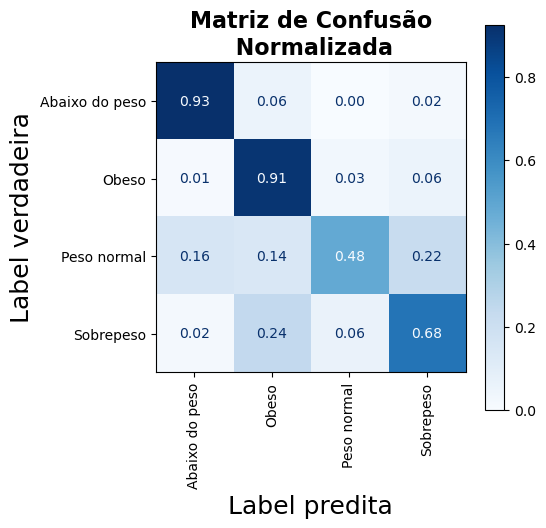


Classification Report
                precision    recall  f1-score   support

Abaixo do peso       0.79      0.93      0.85        54
         Obeso       0.82      0.91      0.86       195
   Peso normal       0.70      0.48      0.57        58
     Sobrepeso       0.76      0.68      0.72       116

      accuracy                           0.79       423
     macro avg       0.77      0.75      0.75       423
  weighted avg       0.78      0.79      0.78       423



In [35]:
roda_modelo(modelo_xgb)